Gravity Model of Trade
============

This notebook contains some code snippets to examine a set of trade data. The data is contained in the file 'project02_pdata_balanced.csv'. The country code can be found in 'country_code.csv'. 

The data is sourced from IMF's *Direction of Trade Statistics* and *International Financial Statistics*, World Bank's *World DEvelopment Indicators*, World Trade Organisation's website [link here](http://www.wto.org) and the CIA's *World Factbook*. 

Explanations on the variables can be found below:

    1. $ONEIN:$ dummy variable for one of the two countries being in GATT/WTO.
    2. $BOTHIN:$ dummy variable for both countries being in GATT/WTO.
    3. $LNRGDP_{it}$ $LNRGDP_{jt}$: (log of) real GDP.
    4. $LNRGDPPOP_{it},$ $LNRGDPPOP_{jt}$ : (log of) real per capita GDP.
    5. $LNDIST_{ij}$: (log of) distance between the trading partners.
    6. $LNLAND_{i},$ $LNLAND_{j}$: (log of) land area of country.
    7. $CLANG_{ij}$: countries share a common language.
    8. $CBORD_{ij}$: countries share a common land border.
    9. $LLOCK_{i},LLOCK_{i}$: dummy variables for a landlocked country.
    10. $ISLAND_{i},$ $ISLAND_{j}$: dummy variables for an island nation.
    11. $EVCOL_{ij}$: dummy for whether country $i$ ever colonised country $j.$
    12. $COMCOL_{ij}$: dummy variable for a common coloniser.
    13. $MUNI_{ijt}$: dummy variable for monetary union membership.
    14. $TA_{ijt}$: dummy variable for a bilateral or regional trade agreement.

**An important research question in this area is whether joining a trade union or organisation such as WTO and GATT has significant positive impact on trade. **

The job here is to see if this dataset can help answering this question. 


In [1]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,9]

In [3]:
data = pd.read_csv('project02_pdata_balanced.csv', header=0)

To see if all the variables are there, we can check the column labels. 

In [4]:
data.head(10)

CBORD  CLANG  COMCOL  EVCOL  GATTWTO1  GATTWTO2  ISLAND1  ISLAND2  ISCOL  \
0    0.0    1.0     0.0    1.0       1.0       1.0      1.0      0.0    0.0   
1    0.0    1.0     0.0    1.0       1.0       1.0      1.0      0.0    0.0   
2    0.0    1.0     0.0    1.0       1.0       1.0      1.0      0.0    0.0   
3    0.0    1.0     0.0    1.0       1.0       1.0      1.0      0.0    0.0   
4    0.0    1.0     0.0    1.0       1.0       1.0      1.0      0.0    0.0   
5    0.0    1.0     0.0    1.0       1.0       1.0      1.0      0.0    0.0   
6    0.0    1.0     0.0    1.0       1.0       1.0      1.0      0.0    0.0   
7    0.0    1.0     0.0    1.0       1.0       1.0      1.0      0.0    0.0   
8    0.0    1.0     0.0    1.0       1.0       1.0      1.0      0.0    0.0   
9    0.0    1.0     0.0    1.0       1.0       1.0      1.0      0.0    0.0   

   LLOCK1    ...      LNRGDPPOP1  LNRGDPPOP2  LNRIMPCIF  MUNI  ONEIN   TA  \
0     0.0    ...        9.246687    9.556335  22.957232   0.0    0.0  0.0   
1     0.0    ...        9.263844    9.564113  22.794325   0.0    0.0  0.0   
2     0.0    ...        9.267894    9.599095  22.767888   0.0    0.0  0.0   
3     0.0    ...        9.300466    9.623649  22.804253   0.0    0.0  0.0   
4     0.0    ...        9.342817    9.664077  23.037444   0.0    0.0  0.0   
5     0.0    ...        9.363698    9.706059  23.055500   0.0    0.0  0.0   
6     0.0    ...        9.378607    9.752288  23.096419   0.0    0.0  0.0   
7     0.0    ...        9.395688    9.768266  23.168167   0.0    0.0  0.0   
8     0.0    ...        9.430133    9.799348  23.259317   0.0    0.0  0.0   
9     0.0    ...        9.445986    9.815913  23.264376   0.0    0.0  0.0   

     YEAR  index  export_id  import_id  
0  1960.0    1.0      112.0      111.0  
1  1961.0    1.0      112.0      111.0  
2  1962.0    1.0      112.0      111.0  
3  1963.0    1.0      112.0      111.0  
4  1964.0    1.0      112.0      111.0  
5  1965.0    1.0      112.0      111.0  
6  1966.0    1.0      112.0      111.0  
7  1967.0    1.0      112.0      111.0  
8  1968.0    1.0      112.0      111.0  
9  1969.0    1.0      112.0      111.0  

[10 rows x 27 columns]

In [5]:
data.tail(10)

CBORD  CLANG  COMCOL  EVCOL  GATTWTO1  GATTWTO2  ISLAND1  ISLAND2  \
24232    0.0    0.0     0.0    0.0       1.0       1.0      0.0      0.0   
24233    0.0    0.0     0.0    0.0       1.0       1.0      0.0      0.0   
24234    0.0    0.0     0.0    0.0       1.0       1.0      0.0      0.0   
24235    0.0    0.0     0.0    0.0       1.0       1.0      0.0      0.0   
24236    0.0    0.0     0.0    0.0       1.0       1.0      0.0      0.0   
24237    0.0    0.0     0.0    0.0       1.0       1.0      0.0      0.0   
24238    0.0    0.0     0.0    0.0       1.0       1.0      0.0      0.0   
24239    0.0    0.0     0.0    0.0       1.0       1.0      0.0      0.0   
24240    0.0    0.0     0.0    0.0       1.0       1.0      0.0      0.0   
24241    0.0    0.0     0.0    0.0       1.0       1.0      0.0      0.0   

       ISCOL  LLOCK1    ...      LNRGDPPOP1  LNRGDPPOP2  LNRIMPCIF  MUNI  \
24232    0.0     0.0    ...        9.180615    8.234306  17.182197   0.0   
24233    0.0     0.0    ...        9.216696    8.280986  17.805710   0.0   
24234    0.0     0.0    ...        9.138469    8.330764  17.453908   0.0   
24235    0.0     0.0    ...        9.221995    8.374283  18.020063   0.0   
24236    0.0     0.0    ...        9.295093    8.435177  18.489292   0.0   
24237    0.0     0.0    ...        9.325420    8.479861  18.385235   0.0   
24238    0.0     0.0    ...        9.387292    8.520158  18.428813   0.0   
24239    0.0     0.0    ...        9.412889    8.556400  18.212311   0.0   
24240    0.0     0.0    ...        9.454245    8.604055  18.537327   0.0   
24241    0.0     0.0    ...        9.488699    8.646561  18.706461   0.0   

       ONEIN   TA    YEAR   index  export_id  import_id  
24232    0.0  0.0  1996.0  1051.0      542.0      944.0  
24233    0.0  0.0  1997.0  1051.0      542.0      944.0  
24234    0.0  0.0  1998.0  1051.0      542.0      944.0  
24235    0.0  0.0  1999.0  1051.0      542.0      944.0  
24236    0.0  0.0  2000.0  1051.0      542.0      944.0  
24237    0.0  0.0  2001.0  1051.0      542.0      944.0  
24238    0.0  0.0  2002.0  1051.0      542.0      944.0  
24239    0.0  0.0  2003.0  1051.0      542.0      944.0  
24240    0.0  0.0  2004.0  1051.0      542.0      944.0  
24241    0.0  0.0  2005.0  1051.0      542.0      944.0  

[10 rows x 27 columns]

In [6]:
data.columns

Index(['CBORD', 'CLANG', 'COMCOL', 'EVCOL', 'GATTWTO1', 'GATTWTO2', 'ISLAND1',
       'ISLAND2', 'ISCOL', 'LLOCK1', 'LLOCK2', 'LNDIST', 'LNLAND1', 'LNLAND2',
       'LNREXPORT', 'LNRGDP1', 'LNRGDP2', 'LNRGDPPOP1', 'LNRGDPPOP2',
       'LNRIMPCIF', 'MUNI', 'ONEIN', 'TA', 'YEAR', 'index', 'export_id',
       'import_id'],
      dtype='object')

Get to know your data
----------

In some sense this is the hardest part. What sort of things can we do to get to know your data? 

The dataset has been cleaned in some ways... so we don't have 33 countries in this dataset. This is done to ensure the panel is balanced. 

Bear in mind that not all counrtries traded with all other countries in the original sample over all time periods. 

In [7]:
c_import = set(data['import_id'])
c_import

{111.0,
 112.0,
 122.0,
 128.0,
 132.0,
 136.0,
 138.0,
 142.0,
 144.0,
 146.0,
 158.0,
 172.0,
 174.0,
 176.0,
 178.0,
 182.0,
 184.0,
 193.0,
 196.0,
 228.0,
 273.0,
 436.0,
 542.0,
 944.0}

We can compare that with the *export_id* variable.

In [8]:
c_export = set(data['export_id'])
c_export

{111.0,
 112.0,
 122.0,
 128.0,
 132.0,
 136.0,
 138.0,
 142.0,
 144.0,
 146.0,
 158.0,
 172.0,
 174.0,
 176.0,
 178.0,
 182.0,
 184.0,
 193.0,
 196.0,
 228.0,
 273.0,
 436.0,
 542.0}

Is there a difference between the two sets of countries? 

In [9]:
c_import.difference(c_export), c_export.difference(c_import)

({944.0}, set())

So Country 944 (Hungry) is in the import list but not the export list. 

The "shape" of the data gives you some idea about the number of observations and the number of variables. 

Note that there are 24 import counrtries and 23 export countries. So the total number of trade pairs is $23\times 23 = 529$. 

Now may be good to see the number of time series observations. 

In [10]:
set(data['YEAR'])

{1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0}

So each trade pair has 46 time series observations if it is balanced. How to check them? 

Well if the data is balanced then each of the 529 trade pairs will have 46 time series observations. So the number of total observations should be 

In [11]:
46*529

24334

Let's check if the number of observations matches... 

In [12]:
data.shape

(24242, 27)

Oops.. it does not.. 

In [13]:
46*529 - data.shape[0]

92

the above is tell us that we are exactly 92 pairs short.... 

**Exercise**

How do we find out which pairs are missing? Can we write a script to see what was missing? 

Change of Status
--------------

Since most pairs have 46 time series observations. Some countries may have different membership status over time. Can we write a script to find out if any country changed their status during the time period? 

In [14]:
g_export = data.groupby('export_id')
change = []
change_number = []
k = 0
for c in c_export: 
    temp = g_export.get_group(c)[['GATTWTO1', 'YEAR', 'import_id']]
    pick = temp.iloc[0,2]
    g_temp = temp[temp['import_id']==pick]
    for i,w in enumerate(g_temp['GATTWTO1']):
        if i==0:
            status = w
        else:
            if w != status:
                status = w
                if c not in change:
                    change.append(c)
                k = k + 1
    if c in change:
        change_number.append(k)
    k = 0
                

In [15]:
change_number

[1, 1, 1, 1, 1, 1, 1, 1]

In [16]:
change

[273.0, 146.0, 542.0, 176.0, 178.0, 436.0, 182.0, 184.0]

In [17]:
temp = g_export.get_group(193)[['GATTWTO1', 'YEAR', 'import_id']]
temp

GATTWTO1    YEAR  import_id
736         1.0  1960.0      111.0
737         1.0  1961.0      111.0
738         1.0  1962.0      111.0
739         1.0  1963.0      111.0
740         1.0  1964.0      111.0
741         1.0  1965.0      111.0
742         1.0  1966.0      111.0
743         1.0  1967.0      111.0
744         1.0  1968.0      111.0
745         1.0  1969.0      111.0
746         1.0  1970.0      111.0
747         1.0  1971.0      111.0
748         1.0  1972.0      111.0
749         1.0  1973.0      111.0
750         1.0  1974.0      111.0
751         1.0  1975.0      111.0
752         1.0  1976.0      111.0
753         1.0  1977.0      111.0
754         1.0  1978.0      111.0
755         1.0  1979.0      111.0
756         1.0  1980.0      111.0
757         1.0  1981.0      111.0
758         1.0  1982.0      111.0
759         1.0  1983.0      111.0
760         1.0  1984.0      111.0
761         1.0  1985.0      111.0
762         1.0  1986.0      111.0
763         1.0  1987.0      111.0
764         1.0  1988.0      111.0
765         1.0  1989.0      111.0
...         ...     ...        ...
23982       1.0  1976.0      944.0
23983       1.0  1977.0      944.0
23984       1.0  1978.0      944.0
23985       1.0  1979.0      944.0
23986       1.0  1980.0      944.0
23987       1.0  1981.0      944.0
23988       1.0  1982.0      944.0
23989       1.0  1983.0      944.0
23990       1.0  1984.0      944.0
23991       1.0  1985.0      944.0
23992       1.0  1986.0      944.0
23993       1.0  1987.0      944.0
23994       1.0  1988.0      944.0
23995       1.0  1989.0      944.0
23996       1.0  1990.0      944.0
23997       1.0  1991.0      944.0
23998       1.0  1992.0      944.0
23999       1.0  1993.0      944.0
24000       1.0  1994.0      944.0
24001       1.0  1995.0      944.0
24002       1.0  1996.0      944.0
24003       1.0  1997.0      944.0
24004       1.0  1998.0      944.0
24005       1.0  1999.0      944.0
24006       1.0  2000.0      944.0
24007       1.0  2001.0      944.0
24008       1.0  2002.0      944.0
24009       1.0  2003.0      944.0
24010       1.0  2004.0      944.0
24011       1.0  2005.0      944.0

[1058 rows x 3 columns]

In [18]:
g_temp = temp[temp['import_id']==111]

In [19]:
g_temp

GATTWTO1    YEAR  import_id
736       1.0  1960.0      111.0
737       1.0  1961.0      111.0
738       1.0  1962.0      111.0
739       1.0  1963.0      111.0
740       1.0  1964.0      111.0
741       1.0  1965.0      111.0
742       1.0  1966.0      111.0
743       1.0  1967.0      111.0
744       1.0  1968.0      111.0
745       1.0  1969.0      111.0
746       1.0  1970.0      111.0
747       1.0  1971.0      111.0
748       1.0  1972.0      111.0
749       1.0  1973.0      111.0
750       1.0  1974.0      111.0
751       1.0  1975.0      111.0
752       1.0  1976.0      111.0
753       1.0  1977.0      111.0
754       1.0  1978.0      111.0
755       1.0  1979.0      111.0
756       1.0  1980.0      111.0
757       1.0  1981.0      111.0
758       1.0  1982.0      111.0
759       1.0  1983.0      111.0
760       1.0  1984.0      111.0
761       1.0  1985.0      111.0
762       1.0  1986.0      111.0
763       1.0  1987.0      111.0
764       1.0  1988.0      111.0
765       1.0  1989.0      111.0
766       1.0  1990.0      111.0
767       1.0  1991.0      111.0
768       1.0  1992.0      111.0
769       1.0  1993.0      111.0
770       1.0  1994.0      111.0
771       1.0  1995.0      111.0
772       1.0  1996.0      111.0
773       1.0  1997.0      111.0
774       1.0  1998.0      111.0
775       1.0  1999.0      111.0
776       1.0  2000.0      111.0
777       1.0  2001.0      111.0
778       1.0  2002.0      111.0
779       1.0  2003.0      111.0
780       1.0  2004.0      111.0
781       1.0  2005.0      111.0

**Exercise**
Can we group data based on their GATT/WTO status so that we can test the statistical difference in means between the two group? 

Testing the difference in mean
----------

A somewhat naive approach to test our hypothesis is to apply a standard t-test between groups, that is, group consists of export countries with $GATTWTO1 = 0$ and group consists of export countries with $GATTWTO1 = 1$. 

The hypothesis is 
$$    
    \begin{align*} H_0:& \mu_1 = \mu_2 \\
                    H_1:& \mu_1 \neq \mu_2 \end{align*} 
$$
with the t-statistics 
$$
        t = \frac{\hat{\mu}_1 - \hat{\mu}_2}{\sqrt{\text{Var} \left ( \hat{\mu}_1 - \hat{\mu}_2 \right )}}.
$$

To do this we can use the *groupby* function to extract the data from the two groups. 

In [20]:
g_status = data.groupby('GATTWTO1')
group1 = g_status.get_group(0)
group2 = g_status.get_group(1)

Using the t-test routine in the Scipy.stats module. 

In [21]:
ttest1 = sps.ttest_ind(group1['LNREXPORT'], group2['LNREXPORT'])
ttest1

Ttest_indResult(statistic=-42.420440438897856, pvalue=0.0)

Using the Index Facilities
------------------------

The approach above did not utilise the index facilities in Pandas which can make the process a lot easier. The idea is to include the *index_col* argument in the *pandas.read_csv* function when loading the data. In the example above, the columns 25, 26 and 23 (*export_id*, *import_id* and *year*) are being used as indexes for the dataset. Note that the order is important. The data will be sorted based on the order of the index. In this case, the data will be first sorted by *export_id* then by *import_id* then by *year*

In [22]:
m2 = pd.read_csv('project02_pdata_balanced.csv', header=0, index_col=[25,26,23])

In [23]:
m2.head(100)

CBORD  CLANG  COMCOL  EVCOL  GATTWTO1  GATTWTO2  \
export_id import_id YEAR                                                      
112.0     111.0     1960.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1961.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1962.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1963.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1964.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1965.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1966.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1967.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1968.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1969.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1970.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1971.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1972.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1973.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1974.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1975.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1976.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1977.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1978.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1979.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1980.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1981.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1982.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1983.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1984.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1985.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1986.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1987.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1988.0    0.0    1.0     0.0    1.0       1.0       1.0   
                    1989.0    0.0    1.0     0.0    1.0       1.0       1.0   
...                           ...    ...     ...    ...       ...       ...   
122.0     111.0     1984.0    0.0    0.0     0.0    0.0       1.0       1.0   
                    1985.0    0.0    0.0     0.0    0.0       1.0       1.0   
                    1986.0    0.0    0.0     0.0    0.0       1.0       1.0   
                    1987.0    0.0    0.0     0.0    0.0       1.0       1.0   
                    1988.0    0.0    0.0     0.0    0.0       1.0       1.0   
                    1989.0    0.0    0.0     0.0    0.0       1.0       1.0   
                    1990.0    0.0    0.0     0.0    0.0       1.0       1.0   
                    1991.0    0.0    0.0     0.0    0.0       1.0       1.0   
                    1992.0    0.0    0.0     0.0    0.0       1.0       1.0   
                    1993.0    0.0    0.0     0.0    0.0       1.0       1.0   
                    1994.0    0.0    0.0     0.0    0.0       1.0       1.0   
                    1995.0    0.0    0.0     0.0    0.0       1.0       1.0   
                    1996.0    0.0    0.0     0.0    0.0       1.0       1.0   
                    1997.0    0.0    0.0     0.0    0.0       1.0       1.0   
                    1998.0    0.0    0.0     0.0    0.0       1.0       1.0   
                    1999.0    0.0    0.0     0.0    0.0       1.0       1.0   
                    2000.0    0.0    0.0     0.0    0.0       1.0       1.0   
                    2001.0    0.0    0.0     0.0    0.0       1.0       1.0   

So now we can extract data by 'slicing' rather than using *groupby*

First we need to make sure the indicies are being sorted properly. This is particuarly important when the index values are not numerical. 

In [24]:
m2.sort_index(inplace=True)

Now we can extract subset of data by using the indexes. Our first example extracts the time series for the trade relation from United Kingdom to United States

In [25]:
UKUS_T = m2.loc[(112,111,slice(None)),:]

We can do a time series plot. Note that the display of the $x$ label can be rotated by using the *rot* argument. 

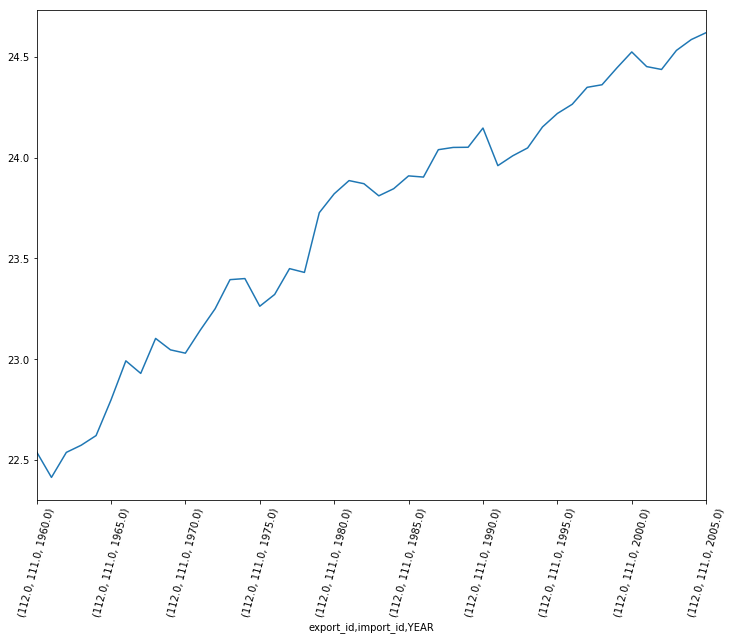

In [26]:
UKUS_T['LNREXPORT'].plot(rot=75)

We can make the x-label a little cleaner

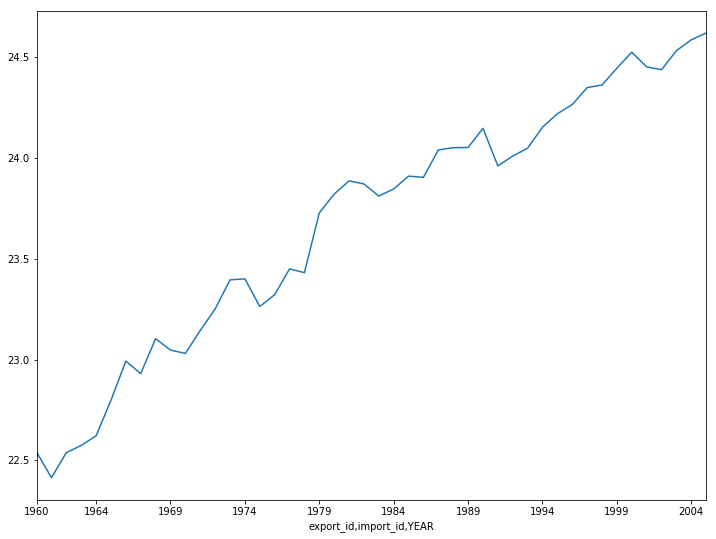

In [35]:
T,K = UKUS_T.shape #obtian information about the number of observations and number of variables.
ax = UKUS_T['LNREXPORT'].plot() #save the plot object into a variable called ax.
xloc = [int(np.floor(i)) for i in np.linspace(0,T-2,10)] #create a list that contain the locations of each tick. 
year = np.arange(1960,2005) 
ticks = [year[i] for i in xloc] #create a list that contains the labels of each tick. 
ax.set_xticks(xloc) #set the location of xticks. 
ax.set_xticklabels(ticks) #set the xticks labels

Another quick example of slicing. It shows we can slice on any one of the three indicies. 

Another slicing example. 

In [28]:
m2.loc[(slice(None),111,1960),:]

CBORD  CLANG  COMCOL  EVCOL  GATTWTO1  GATTWTO2  \
export_id import_id YEAR                                                      
112.0     111.0     1960.0    0.0    1.0     0.0    1.0       1.0       1.0   
122.0     111.0     1960.0    0.0    0.0     0.0    0.0       1.0       1.0   
128.0     111.0     1960.0    0.0    1.0     0.0    0.0       1.0       1.0   
132.0     111.0     1960.0    0.0    0.0     0.0    0.0       1.0       1.0   
136.0     111.0     1960.0    0.0    0.0     0.0    0.0       1.0       1.0   
138.0     111.0     1960.0    0.0    0.0     0.0    0.0       1.0       1.0   
142.0     111.0     1960.0    0.0    0.0     0.0    0.0       1.0       1.0   
144.0     111.0     1960.0    0.0    0.0     0.0    0.0       1.0       1.0   
146.0     111.0     1960.0    0.0    0.0     0.0    0.0       0.0       1.0   
158.0     111.0     1960.0    0.0    0.0     0.0    0.0       1.0       1.0   
172.0     111.0     1960.0    0.0    0.0     0.0    0.0       1.0       1.0   
174.0     111.0     1960.0    0.0    1.0     0.0    0.0       1.0       1.0   
176.0     111.0     1960.0    0.0    1.0     0.0    0.0       0.0       1.0   
178.0     111.0     1960.0    0.0    1.0     1.0    0.0       0.0       1.0   
182.0     111.0     1960.0    0.0    0.0     0.0    0.0       0.0       1.0   
184.0     111.0     1960.0    0.0    1.0     0.0    0.0       0.0       1.0   
193.0     111.0     1960.0    0.0    1.0     1.0    0.0       1.0       1.0   
196.0     111.0     1960.0    0.0    1.0     1.0    0.0       1.0       1.0   
228.0     111.0     1960.0    0.0    1.0     0.0    0.0       1.0       1.0   
273.0     111.0     1960.0    1.0    1.0     0.0    0.0       0.0       1.0   
436.0     111.0     1960.0    0.0    1.0     1.0    0.0       0.0       1.0   
542.0     111.0     1960.0    0.0    1.0     0.0    0.0       0.0       1.0   

                            ISLAND1  ISLAND2  ISCOL  LLOCK1  ...    LNREXPORT  \
export_id import_id YEAR                                     ...                
112.0     111.0     1960.0      1.0      0.0    0.0     0.0  ...    22.540961   
122.0     111.0     1960.0      0.0      0.0    0.0     1.0  ...    19.476303   
128.0     111.0     1960.0      0.0      0.0    0.0     0.0  ...    20.479403   
132.0     111.0     1960.0      0.0      0.0    0.0     0.0  ...    21.570564   
136.0     111.0     1960.0      0.0      0.0    0.0     0.0  ...    21.534002   
138.0     111.0     1960.0      0.0      0.0    0.0     0.0  ...    20.853447   
142.0     111.0     1960.0      0.0      0.0    0.0     0.0  ...    19.682297   
144.0     111.0     1960.0      0.0      0.0    0.0     0.0  ...    20.678047   
146.0     111.0     1960.0      0.0      0.0    0.0     1.0  ...    20.816511   
158.0     111.0     1960.0      1.0      0.0    0.0     0.0  ...    22.586665   
172.0     111.0     1960.0      0.0      0.0    0.0     0.0  ...    19.464083   
174.0     111.0     1960.0      0.0      0.0    0.0     0.0  ...    18.883240   
176.0     111.0     1960.0      1.0      0.0    0.0     0.0  ...    17.817063   
178.0     111.0     1960.0      1.0      0.0    0.0     0.0  ...    19.019971   
182.0     111.0     1960.0      0.0      0.0    0.0     0.0  ...    19.181851   
184.0     111.0     1960.0      0.0      0.0    0.0     0.0  ...    19.857177   
193.0     111.0     1960.0      1.0      0.0    0.0     0.0  ...    20.489008   
196.0     111.0     1960.0      1.0      0.0    0.0     0.0  ...    20.255703   
228.0     111.0     1960.0      0.0      0.0    0.0     0.0  ...    20.780909   
273.0     111.0     1960.0      0.0      0.0    0.0     0.0  ...    21.697309   
436.0     111.0     1960.0      0.0      0.0    0.0     0.0  ...    18.953940   
542.0     111.0     1960.0      0.0      0.0    0.0     0.0  ...    16.884686   

                              LNRGDP1    LNRGDP2  LNRGDPPOP1  LNRGDPPOP2  \
export_id import_id YEAR                                                   
112.0     111.0     1960.0  27.020

In [29]:
m2.loc[(112,slice(None),1960),:]

CBORD  CLANG  COMCOL  EVCOL  GATTWTO1  GATTWTO2  \
export_id import_id YEAR                                                      
112.0     111.0     1960.0    0.0    1.0     0.0    1.0       1.0       1.0   
          122.0     1960.0    0.0    0.0     0.0    0.0       1.0       1.0   
          128.0     1960.0    0.0    1.0     0.0    0.0       1.0       1.0   
          132.0     1960.0    0.0    0.0     0.0    0.0       1.0       1.0   
          136.0     1960.0    0.0    0.0     0.0    0.0       1.0       1.0   
          138.0     1960.0    0.0    0.0     0.0    0.0       1.0       1.0   
          142.0     1960.0    0.0    0.0     0.0    0.0       1.0       1.0   
          144.0     1960.0    0.0    0.0     0.0    0.0       1.0       1.0   
          146.0     1960.0    0.0    0.0     0.0    0.0       1.0       0.0   
          158.0     1960.0    0.0    0.0     0.0    0.0       1.0       1.0   
          172.0     1960.0    0.0    0.0     0.0    0.0       1.0       1.0   
          174.0     1960.0    0.0    1.0     0.0    0.0       1.0       1.0   
          176.0     1960.0    0.0    1.0     0.0    0.0       1.0       0.0   
          178.0     1960.0    1.0    1.0     0.0    1.0       1.0       0.0   
          182.0     1960.0    0.0    0.0     0.0    0.0       1.0       0.0   
          184.0     1960.0    0.0    0.0     0.0    0.0       1.0       0.0   
          193.0     1960.0    0.0    1.0     0.0    1.0       1.0       1.0   
          196.0     1960.0    0.0    1.0     0.0    1.0       1.0       1.0   
          228.0     1960.0    0.0    0.0     0.0    0.0       1.0       1.0   
          273.0     1960.0    0.0    0.0     0.0    0.0       1.0       0.0   
          436.0     1960.0    0.0    1.0     0.0    1.0       1.0       0.0   
          542.0     1960.0    0.0    1.0     0.0    0.0       1.0       0.0   
          944.0     1960.0    0.0    0.0     0.0    0.0       1.0       0.0   

                            ISLAND1  ISLAND2  ISCOL  LLOCK1   ...    \
export_id import_id YEAR                                      ...     
112.0     111.0     1960.0      1.0      0.0    0.0     0.0   ...     
          122.0     1960.0      1.0      0.0    0.0     0.0   ...     
          128.0     1960.0      1.0      0.0    0.0     0.0   ...     
          132.0     1960.0      1.0      0.0    0.0     0.0   ...     
          136.0     1960.0      1.0      0.0    0.0     0.0   ...     
          138.0     1960.0      1.0      0.0    0.0     0.0   ...     
          142.0     1960.0      1.0      0.0    0.0     0.0   ...     
          144.0     1960.0      1.0      0.0    0.0     0.0   ...     
          146.0     1960.0      1.0      0.0    0.0     0.0   ...     
          158.0     1960.0      1.0      1.0    0.0     0.0   ...     
          172.0     1960.0      1.0      0.0    0.0     0.0   ...     
          174.0     1960.0      1.0      0.0    0.0     0.0   ...     
          176.0     1960.0      1.0      1.0    0.0     0.0   ...     
          178.0     1960.0      1.0      1.0    0.0     0.0   ...     
          182.0     1960.0      1.0      0.0    0.0     0.0   ...     
          184.0     1960.0      1.0      0.0    0.0     0.0   ...     
          193.0     1960.0      1.0      1.0    0.0     0.0   ...     
          196.0     1960.0      1.0      1.0    0.0     0.0   ...     
          228.0     1960.0      1.0      0.0    0.0     0.0   ...     
          273.0     1960.0      1.0      0.0    0.0     0.0   ...     
          436.0     1960.0      1.0      0.0    0.0     0.0   ...     
          542.0     1960.0      1.0      0.0    0.0     0.0   ...     
          944.0     1960.0      1.0      0.0    0.0     0.0   ...     

                            LNREXPORT    LNRGDP1    LNRGDP2  LNRGDPPOP1  \
export_id import_id YEAR                                                  
112.0     111.0     1960.0  22.540961  27.020589  28.568523    9.246687   
          122.0     1960.0  19.708314  27.020589  2

Let's see if there is any statistical differences between member and non member over time. 

In [40]:
save_test = []
for t in range(1960,2005):
    temp = m2.loc[(slice(None),slice(None),t),:]
    g_temp = temp.groupby('GATTWTO1')
    try:
        g0 = g_temp.get_group(0)['LNREXPORT']
    except:
        g0 = 0
        print('All countries are members in Year {0}'.format(t))
    try:
        g1 = g_temp.get_group(1)['LNREXPORT']
    except:
        g1 = 1
        print('All countries are non members in Year {1}'.format(t))
    try:
        tempt =  sps.ttest_ind(g0,g1)
        save_test.append((t, tempt))
    except:
        save_test.append('Failed due to lack of observations')

All countries are members in Year 1986
All countries are members in Year 1987
All countries are members in Year 1988
All countries are members in Year 1989
All countries are members in Year 1990
All countries are members in Year 1991
All countries are members in Year 1992
All countries are members in Year 1993
All countries are members in Year 1994
All countries are members in Year 1995
All countries are members in Year 1996
All countries are members in Year 1997
All countries are members in Year 1998
All countries are members in Year 1999
All countries are members in Year 2000
All countries are members in Year 2001
All countries are members in Year 2002
All countries are members in Year 2003
All countries are members in Year 2004


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [41]:
save_test

[(1960,
  Ttest_indResult(statistic=-7.4367249451119113, pvalue=4.2331078178984722e-13)),
 (1961,
  Ttest_indResult(statistic=-8.5135945837183957, pvalue=1.7807813488018563e-16)),
 (1962,
  Ttest_indResult(statistic=-6.2066665537101082, pvalue=1.0995972595992961e-09)),
 (1963,
  Ttest_indResult(statistic=-7.7495041880017519, pvalue=4.8058495098039096e-14)),
 (1964,
  Ttest_indResult(statistic=-6.5544294834600141, pvalue=1.3366856978602616e-10)),
 (1965,
  Ttest_indResult(statistic=-6.092484437315739, pvalue=2.151965251760001e-09)),
 (1966,
  Ttest_indResult(statistic=-7.7927840032934554, pvalue=3.5373329267417983e-14)),
 (1967,
  Ttest_indResult(statistic=-5.3908872094474587, pvalue=1.0611999573964199e-07)),
 (1968,
  Ttest_indResult(statistic=-1.616952316394811, pvalue=0.10648923945510159)),
 (1969,
  Ttest_indResult(statistic=-1.8320104778004056, pvalue=0.06751619682219813)),
 (1970,
  Ttest_indResult(statistic=-2.4863463248901247, pvalue=0.013216027927842208)),
 (1971,
  Ttest_indRe

So looks like all countries in this dataset joined WTO after 1986. So what does this say about our first set of test results? 